
#  Doordash Analysis

  

## Objectives   
* Optimize decision-making for orders on the DoorDash platform by analyzing and processing the app's provided data.
* Provide valuable insights to restaurants, comparing them to their competition through data analysis and processing
<BR>

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

**1. Loading the libraries**<br>

**2. Downloading and Prepping Data**<br>

**3. EDA (Exploratory Data Analysis)**<br>
*   Total price generated by store<br>
*   Restaurants with a single order<br>
*   Delivery time vs order price<br>

**4. Restaurants map**


---

## Loading the libraries<a id="0"></a>

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st

import matplotlib.pyplot as plt
from matplotlib import pyplot
import plotly.express as px
import seaborn as sns

#from datetime import timedelta
from datetime import datetime, timedelta

In [2]:
!pip3 install folium==0.9.1
import folium

print('Folium installed and imported!')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 1.3 MB/s eta 0:00:00
  Attempting uninstall: folium
    Found existing installation: folium 0.14.0
    Uninstalling folium-0.14.0:
      Successfully uninstalled folium-0.14.0
Folium installed and imported!


## Downloading and prepping data<a id="2"></a>


Let's utilize the dataset provided by DoorDash to each user, it contains the follow features:

|  Feature |  Description
|---|---|
| ORDER_CREATED_TIME  | Order created time |
| ACTUAL_PICKUP_TIME  | Order pickup time |
| ACTUAL_DELIVERY_TIME  | Order delivery time  |
| STORE_NAME|Store Name|
| TOTAL_ITEM_COUNT  | Total order items |
| SUBTOTAL_IN_CENTS  | Order price in cents  |
| SUBTOTAL_IN_DOLLARS  | Order price in dollars |
| ORDER_STATUS  | Order Status |

<br>

This analysis is focused on the city of Roseville, California

Let's download and read the Doordash dataset into a DataFrame.

In [3]:
path='https://docs.google.com/spreadsheets/d/e/2PACX-1vR059B2v0bukwRW8pVYnzNlVE7tkK5osG4JzrmlWMZpZobw0F2DxOojWuJLU2zr1z2w-0EpK4i0rTZ-/pub?gid=69550479&single=true&output=csv'
df = pd.read_csv(path)
df.head()

,ORDER_CREATED_TIME,ACTUAL_PICKUP_TIME,ACTUAL_DELIVERY_TIME,STORE_NAME,TOTAL_ITEM_COUNT,SUBTOTAL_IN_CENTS,SUBTOTAL_IN_DOLLARS,ORDER_STATUS
0,2021-04-04 01:33:32.079344000,2021-04-04 01:38:36.420833000,2021-04-04 01:53:14.332745000,Panda Express (1137),2,1.225.000.000.000.000,12.25,Order Delivered
1,2021-04-04 01:53:50.715216000,2021-04-04 02:02:08.242230000,2021-04-04 02:12:02.839065000,Cold Stone Creamery (20168),4,3.204.000.000.000.000,32.04,Order Delivered
2,2021-04-04 02:05:10.658239000,2021-04-04 02:39:05.110307000,2021-04-04 02:48:32.845958000,Pizza Guys #113,5,3.344.000.000.000.000,33.44,Order Delivered
3,2021-04-04 02:11:53.433320000,2021-04-04 02:39:01.865088000,2021-04-04 02:55:35.126698000,Pizza Guys #113,2,1.698.000.000.000.000,16.98,Order Delivered
4,2021-04-06 00:51:57.481510000,2021-04-06 01:08:12.985536000,2021-04-06 01:18:40.779922000,McDonald's (13464-FOOTHILL & BASELINE),10,3.803.000.000.000.000,38.03,Order Delivered


In [4]:
#Verifying the info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687 entries, 0 to 686
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDER_CREATED_TIME    687 non-null    object 
 1   ACTUAL_PICKUP_TIME    687 non-null    object 
 2   ACTUAL_DELIVERY_TIME  687 non-null    object 
 3   STORE_NAME            686 non-null    object 
 4   TOTAL_ITEM_COUNT      687 non-null    int64  
 5   SUBTOTAL_IN_CENTS     687 non-null    object 
 6   SUBTOTAL_IN_DOLLARS   687 non-null    float64
 7   ORDER_STATUS          687 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 43.1+ KB


We observe that the dataset consists of 687 inputs and 8 features, most of which are of object type and do not contain null values. The most important characteristic that will be used to analyze the dataset is 'SUBTOTAL_IN_DOLLARS' in order to establish relationships between the number of orders, the store, the delivery time, and the total revenue generated by each store.

__*Dropping some features:*__

*   The __*SUBTOTAL_IN_CENTS*__ column contains redundant information about the value of each order in cents, we already have a column that provides us with this information in dollars (SUBTOTAL_IN_DOLLARS).

*   The __*ORDER_STATUS*__ column contains only one value ('Order Delivered') that is repeated across all records.


In [5]:
df = df.drop(['SUBTOTAL_IN_CENTS', 'ORDER_STATUS'], axis=1)
df.head()

,ORDER_CREATED_TIME,ACTUAL_PICKUP_TIME,ACTUAL_DELIVERY_TIME,STORE_NAME,TOTAL_ITEM_COUNT,SUBTOTAL_IN_DOLLARS
0,2021-04-04 01:33:32.079344000,2021-04-04 01:38:36.420833000,2021-04-04 01:53:14.332745000,Panda Express (1137),2,12.25
1,2021-04-04 01:53:50.715216000,2021-04-04 02:02:08.242230000,2021-04-04 02:12:02.839065000,Cold Stone Creamery (20168),4,32.04
2,2021-04-04 02:05:10.658239000,2021-04-04 02:39:05.110307000,2021-04-04 02:48:32.845958000,Pizza Guys #113,5,33.44
3,2021-04-04 02:11:53.433320000,2021-04-04 02:39:01.865088000,2021-04-04 02:55:35.126698000,Pizza Guys #113,2,16.98
4,2021-04-06 00:51:57.481510000,2021-04-06 01:08:12.985536000,2021-04-06 01:18:40.779922000,McDonald's (13464-FOOTHILL & BASELINE),10,38.03


Because some Stores Name have an apostrophe (') We need to remove it to future  manipulation.

In [6]:
df['STORE_NAME'] = df['STORE_NAME'].str.replace("'",'')

Now, we will create a derived attribute called __*DELTA_TIME*__ which will contain the difference between the order delivery time __*ACTUAL_DELIVERY_TIME*__ and the time the order was created __*ORDER_CREATED_TIME*__, in order to obtain the time each order took to be delivered.

In [7]:
#Hayamos la diferencia entre el tiempo de entrega y el tiempo de creación de la orden
df['DELTA_TIME'] = pd.to_datetime(df['ACTUAL_DELIVERY_TIME']) - pd.to_datetime(df['ORDER_CREATED_TIME'])
df['DELTA_TIME']= df['DELTA_TIME'].astype(str).str.replace("0 days","")
df.head()

,ORDER_CREATED_TIME,ACTUAL_PICKUP_TIME,ACTUAL_DELIVERY_TIME,STORE_NAME,TOTAL_ITEM_COUNT,SUBTOTAL_IN_DOLLARS,DELTA_TIME
0,2021-04-04 01:33:32.079344000,2021-04-04 01:38:36.420833000,2021-04-04 01:53:14.332745000,Panda Express (1137),2,12.25,00:19:42.253401
1,2021-04-04 01:53:50.715216000,2021-04-04 02:02:08.242230000,2021-04-04 02:12:02.839065000,Cold Stone Creamery (20168),4,32.04,00:18:12.123849
2,2021-04-04 02:05:10.658239000,2021-04-04 02:39:05.110307000,2021-04-04 02:48:32.845958000,Pizza Guys #113,5,33.44,00:43:22.187719
3,2021-04-04 02:11:53.433320000,2021-04-04 02:39:01.865088000,2021-04-04 02:55:35.126698000,Pizza Guys #113,2,16.98,00:43:41.693378
4,2021-04-06 00:51:57.481510000,2021-04-06 01:08:12.985536000,2021-04-06 01:18:40.779922000,McDonalds (13464-FOOTHILL & BASELINE),10,38.03,00:26:43.298412


We create another derived attribute called DELTA_TIME_MIN, which represents the difference between the delivery time and the order pickup time in minutes. **This feature will be used for analyzing the dataset.**

In [8]:
#Separamos la columna DELTA_TIME en tres columnas: horas, minutos y segundos
df[["h","m","s"]] = df['DELTA_TIME'].str.split(":", expand=True).astype(float)

#Creamos un atributo derivado llamado DELTA_TIME_MIN el cual contiene el tiempo de cada orden en minutos
df['DELTA_TIME_MIN']=df['m']+(df['s']/100)

#Se eliminan las columnas que no nos aportan al análisis
df.drop(['h', 'm', 's'], axis=1, inplace=True)

df.head()

,ORDER_CREATED_TIME,ACTUAL_PICKUP_TIME,ACTUAL_DELIVERY_TIME,STORE_NAME,TOTAL_ITEM_COUNT,SUBTOTAL_IN_DOLLARS,DELTA_TIME,DELTA_TIME_MIN
0,2021-04-04 01:33:32.079344000,2021-04-04 01:38:36.420833000,2021-04-04 01:53:14.332745000,Panda Express (1137),2,12.25,00:19:42.253401,19.422534
1,2021-04-04 01:53:50.715216000,2021-04-04 02:02:08.242230000,2021-04-04 02:12:02.839065000,Cold Stone Creamery (20168),4,32.04,00:18:12.123849,18.121238
2,2021-04-04 02:05:10.658239000,2021-04-04 02:39:05.110307000,2021-04-04 02:48:32.845958000,Pizza Guys #113,5,33.44,00:43:22.187719,43.221877
3,2021-04-04 02:11:53.433320000,2021-04-04 02:39:01.865088000,2021-04-04 02:55:35.126698000,Pizza Guys #113,2,16.98,00:43:41.693378,43.416934
4,2021-04-06 00:51:57.481510000,2021-04-06 01:08:12.985536000,2021-04-06 01:18:40.779922000,McDonalds (13464-FOOTHILL & BASELINE),10,38.03,00:26:43.298412,26.432984


##EDA Exploratory Data Analysis


Let's inspect the 'SUBTOTAL_IN_DOLLARS' feature in order to detect those orders that have not been assigned a price.

In [ ]:
df.groupby(['SUBTOTAL_IN_DOLLARS'])['SUBTOTAL_IN_DOLLARS'].agg(['count'])

,count
SUBTOTAL_IN_DOLLARS,
0.00,35
1.49,1
3.18,1
4.49,1
4.87,1
...,...
80.86,1
81.65,1
84.76,1


<div class="alert alert-block alert-warning" style="margin-top: 20px">

**Observation:**

In our dataset, orders that have not recorded any payment are represented with a value of 0 dollars, and there are a total of 35 such orders. To retain this data and prevent bias, we will replace these values with the median. This approach is necessary because there are orders with very high prices that could significantly influence the average if we were to use it for replacement

In [ ]:
#MEDIAN
median = df['SUBTOTAL_IN_DOLLARS'].median()
df.replace(0, median, inplace = True)

We verify whether the orders with values of 0 dollars have been successfully replaced.

In [ ]:
df.groupby(['SUBTOTAL_IN_DOLLARS'])['SUBTOTAL_IN_DOLLARS'].agg(['count'])

,count
SUBTOTAL_IN_DOLLARS,
1.49,1
3.18,1
4.49,1
4.87,1
4.88,1
...,...
80.86,1
81.65,1
84.76,1


We will visualize the numerical variables and their combinations to easily identify dependency relationships, symmetry, and outliers among them.

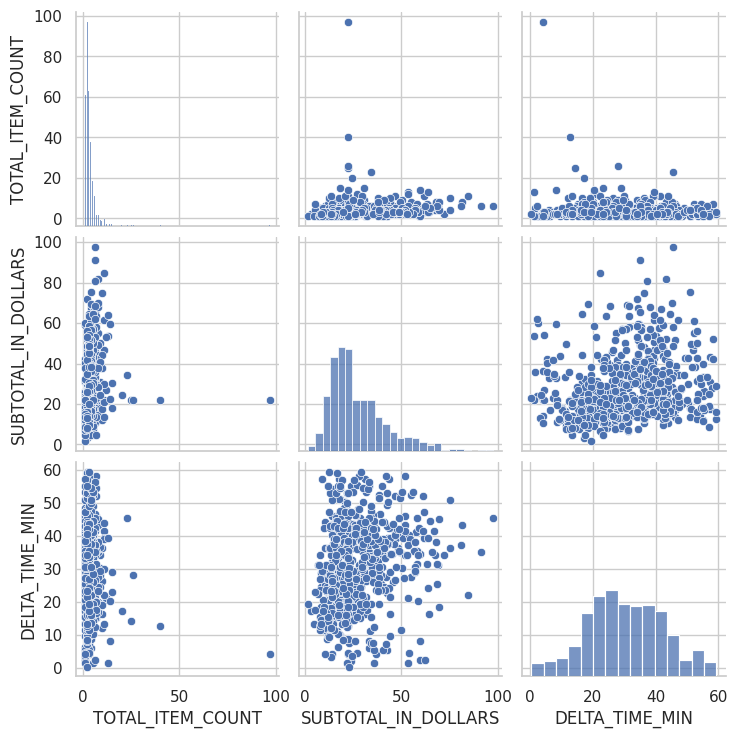

In [ ]:
sub_df = df[['TOTAL_ITEM_COUNT','SUBTOTAL_IN_DOLLARS', 'DELTA_TIME_MIN']]
sns.set(style="whitegrid")
sns.pairplot(sub_df)
plt.show()

<div class="alert alert-block alert-warning" style="margin-top: 20px">

**Observation:** There are some outliers in total item count feature.

In [ ]:
df.sort_values(by='TOTAL_ITEM_COUNT', ascending=False).head(2)

,ORDER_CREATED_TIME,ACTUAL_PICKUP_TIME,ACTUAL_DELIVERY_TIME,STORE_NAME,TOTAL_ITEM_COUNT,SUBTOTAL_IN_DOLLARS,DELTA_TIME,DELTA_TIME_MIN
68,2021-04-13 01:55:49.913187000,2021-04-13 02:36:44.274807000,2021-04-13 03:00:08.182434000,Walmart Grocery (Pleasant Grove Boulevard),97,22.08,01:04:18.269247,4.182692
229,2021-05-10 08:54:23.952012000,2021-05-10 17:55:44.808229000,2021-05-10 18:07:22.366014000,Walmart Grocery (Pleasant Grove Boulevard),40,22.08,09:12:58.414002,12.584140


These outlier orders originate from the Walmart Grocery (Pleasant Grove Boulevard) store. It has been decided to remove these outliers because it is highly improbable to receive orders with such a large quantity of items.

In [ ]:
df = df.drop([68,229])

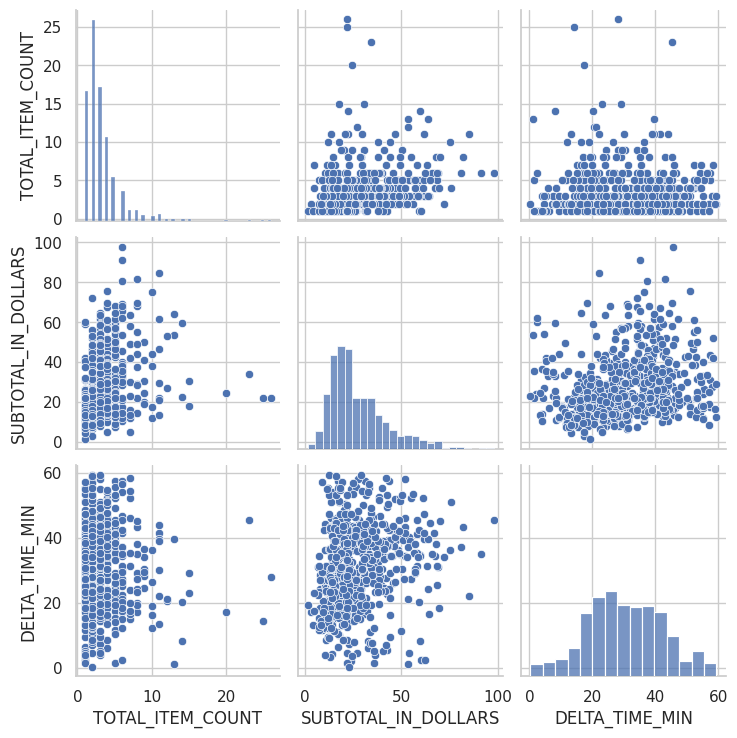

In [ ]:
sub_df = df[['TOTAL_ITEM_COUNT','SUBTOTAL_IN_DOLLARS', 'DELTA_TIME_MIN']]
sns.pairplot(sub_df)
plt.show()

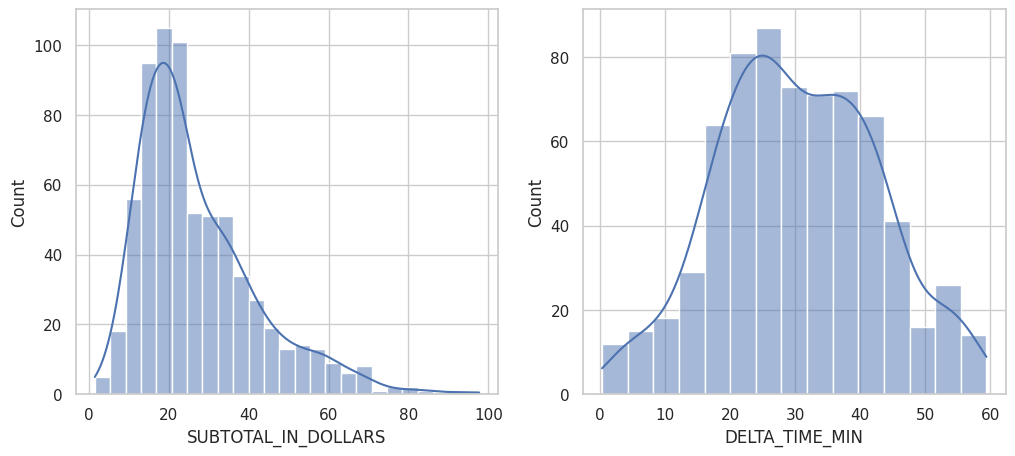

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.histplot(df["SUBTOTAL_IN_DOLLARS"], kde=True)

plt.subplot(1, 2, 2)
sns.histplot(df["DELTA_TIME_MIN"], kde=True)
plt.show()

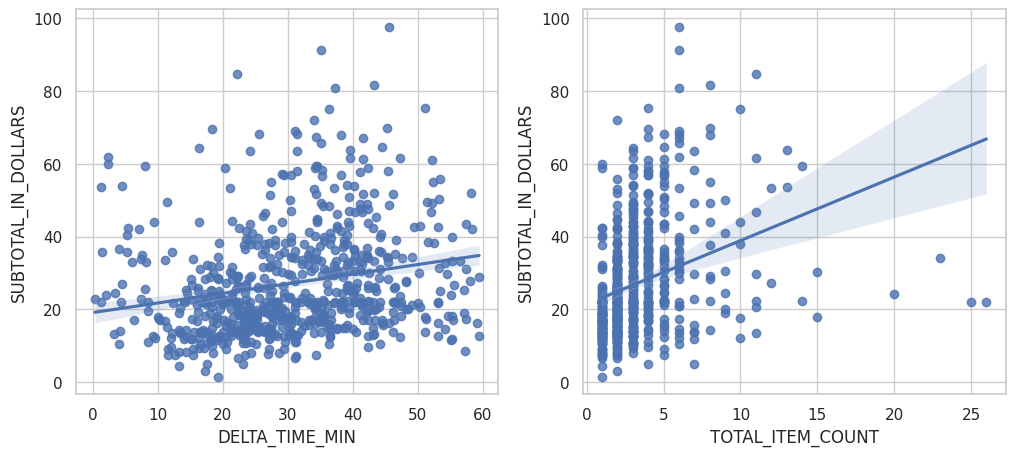

In [ ]:
plt.figure(figsize=(12,5))

#subplot(nrows, ncols, index)
plt.subplot(1, 2, 1)
sns.regplot(df, x='DELTA_TIME_MIN', y='SUBTOTAL_IN_DOLLARS')

plt.subplot(1, 2, 2)
sns.regplot(df, x='TOTAL_ITEM_COUNT', y='SUBTOTAL_IN_DOLLARS')

plt.show()

<div class="alert alert-block alert-warning" style="margin-top: 20px">

**Observation:**<br>

Symmetry of the data:

* As anticipated, there is a positive bias in the total price per order. Replacing orders with a value of 0 by the median was a wise decision.
* The time attribute per order in minutes maintains its symmetry.

Interpretation of the data:

* In terms of price, the majority of orders consist of up to 5 items, with rare instances of orders exceeding 10 items.
* The most frequent order payment falls within the range of 10 to 35 dollars.
* Most orders are delivered within a time frame of 20 to 45 minutes.

### Total price generated by store

We will group the data by STORE_NAME and sum the **SUBTOTAL_IN_DOLLARS** column to obtain the **TOTAL_PRICE** for each store. Afterward, we will sort the groups to identify the 15 restaurants with the highest Total Price and their corresponding Total Orders.

In [ ]:
df_sorted = df.groupby(['STORE_NAME'])['SUBTOTAL_IN_DOLLARS'].agg(['sum','count']).sort_values('sum', ascending=False).reset_index()
df_sorted.columns = ['STORE_NAME', 'TOTAL_PRICE', 'ORDERS']
df_sorted.head(15)

,STORE_NAME,TOTAL_PRICE,ORDERS
0,Jacks Urban Eats (Fountains),2306.62,64
1,Boudin SF (Roseville),715.49,23
2,Taco Bell (28763),585.95,26
3,California Pizza Kitchen (293),574.23,15
4,The Cheesecake Factory (Roseville - 0140),556.23,15
5,BJs Restaurant & Brewhouse (Roseville - 436),550.15,17
6,Burger Lounge (Roseville),422.53,15
7,Zocalo (Roseville Pkwy),365.75,11
8,"Lazy Dog Restaurant & Bar (Roseville, CA)",306.70,7
9,DashMart (SAC-2),274.42,11


We will use boxplots to visualize the statistical distribution of the dataset and identify outliers.

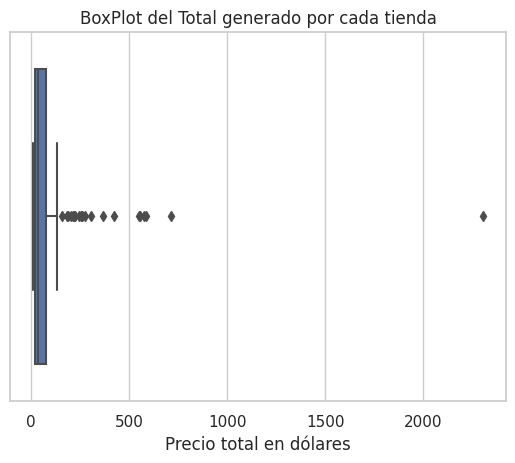

In [ ]:
sns.boxplot(x = df_sorted['TOTAL_PRICE'])
plt.title("BoxPlot del Total generado por cada tienda")
plt.xlabel("Precio total en dólares")
plt.show()

<div class="alert alert-block alert-warning" style="margin-top: 20px">

**Observation:** There are numerous outliers in the price per order, but there is one particularly extreme outlier corresponding to the total price in dollars generated by the 'Jacks Urban Eats (Fountains)' store. It has been decided to drop the records of this store from our dataset to prevent bias in the analysis; however, these data will be considered separately at a later stage.

In [ ]:
#Deleting "Jacks Urban Eats (Fountains)" records
df_sorted2 = df_sorted.drop([0])

#Cheking the new dataframe
df_sorted2.head(15)

,STORE_NAME,TOTAL_PRICE,ORDERS
1,Boudin SF (Roseville),715.49,23
2,Taco Bell (28763),585.95,26
3,California Pizza Kitchen (293),574.23,15
4,The Cheesecake Factory (Roseville - 0140),556.23,15
5,BJs Restaurant & Brewhouse (Roseville - 436),550.15,17
6,Burger Lounge (Roseville),422.53,15
7,Zocalo (Roseville Pkwy),365.75,11
8,"Lazy Dog Restaurant & Bar (Roseville, CA)",306.70,7
9,DashMart (SAC-2),274.42,11
10,Mendocino Farms (Roseville Pkwy),260.01,10


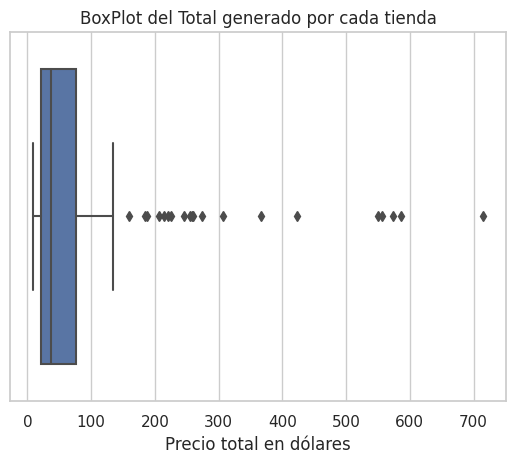

In [ ]:
#New Boxplot without the store
sns.boxplot(x = df_sorted2['TOTAL_PRICE'])
plt.title("BoxPlot del Total generado por cada tienda")
plt.xlabel("Precio total en dólares")
plt.show()

In [ ]:
df_sorted2.describe().T

,count,mean,std,min,25%,50%,75%,max
TOTAL_PRICE,228.0,71.406184,100.917971,8.13,22.08,37.205,75.585,715.49
ORDERS,228.0,2.719298,3.513370,1.00,1.00,2.000,3.000,26.00


###Highest profit restaurants

This plot shows the Total Price in dollars for each restaurant in our top 15

In [ ]:
top_15 = df_sorted2.head(15)
fig = px.bar(top_15, x='STORE_NAME', y='TOTAL_PRICE', title='Top 15 Restaurants highest Total Price',
             labels = {'STORE_NAME': 'Store Name', 'TOTAL_PRICE': 'Total Price in Dollars', 'ORDERS': 'Orders'},
             hover_data=['ORDERS'], color = 'STORE_NAME')
fig.show()

<div class="alert alert-block alert-info" style="margin-top: 20px">

**You can view the graph at the following link:** [Top 15 Restaurants highest Total Price](https://rvdizeo.github.io/Door_Dash_App_Data_Analysis/top_15)

###Total number of orders by restaurant

The figure below displays the total number of orders for each restaurant in our top 15.

**Note:** The bar on the right relates the number of orders to the total price generated by each restaurant. Yellow represents a very high total price, and dark blue represents a lower total price.

In [ ]:
fig = px.bar(top_15, x='STORE_NAME', y='ORDERS', title='Total Orders by Restaurant',
             labels = {'STORE_NAME': 'Store Name', 'ORDERS': 'Orders', 'TOTAL_PRICE': 'Total Price in Dollars'},
             hover_data=['TOTAL_PRICE'], color = 'TOTAL_PRICE')
fig.show()

<div class="alert alert-block alert-info" style="margin-top: 20px">

**You can view the graph at the following link:** [Total Orders by Restaurant](https://rvdizeo.github.io/Door_Dash_App_Data_Analysis/Total_Orders_by_Restaurant.html)

<div class="alert alert-block alert-warning" style="margin-top: 20px">

**We observe the following:**

* The store that generates the most profit is Boudin SF with 715.49 dollars from 23 orders.
* The Taco Bell, California Pizza Kitchen, The Cheesecake Factory and BJs Restaurant & Brewhouse stores generate profits in the range of 550 to 585 dollars. However,Taco Bell requires more orders, averaging 11 more orders compared to the other restaurants in this range.
* McDonalds, Mezcalito Oaxacan, Chipotle, Sonic Drive-in and Crumbl Cookies stores generate profits in the range of 220 to 260 dollars, McDonald's requires 15 orders to belong to this range, while Mezcalito Oaxacan and Chipotle achieve this with 8 fewer orders.

###Comparing Numbers of Orders with Total Price

This plot displays the Total Price in dollars generated by each restaurant in our top 15.

In [ ]:
fig = px.bar(top_15, y='TOTAL_PRICE', x='ORDERS', title='Comparing Numbers of Orders with Total Price',
             labels = {'TOTAL_PRICE': 'Total Price in Dollars', 'ORDERS': 'Orders', 'STORE_NAME': 'Store Name'},
             hover_data=['STORE_NAME'], color = 'STORE_NAME')
fig.show()

<div class="alert alert-block alert-info" style="margin-top: 20px">

**You can view the graph at the following link:** [Comparing Numbers of Orders with Total Price](https://rvdizeo.github.io/Door_Dash_App_Data_Analysis/Numbers_of_Orders_Total_Price.html)

<div class="alert alert-block alert-warning" style="margin-top: 20px">

**We observe the following:**
* The total generated by Zocalo and DashMart combined reaches 641 dollars in 22 orders, Boudin-SF can exceed this amount by 75 dollars with 23 orders.
* California Pizza Kitchen and The Cheesecake factory can achieve a total similar to that generated by Taco Bell with 11 fewer orders.
* Mendocino Farm can generate an amount similar to McDonald's with 5 fewer orders.

###Restaurants with a single order

In [ ]:
df_sorted2.value_counts('ORDERS')

ORDERS
1     113
2      53
3      24
5       9
4       8
15      4
6       3
8       3
11      3
10      2
12      2
7       1
17      1
23      1
26      1
dtype: int64

<div class="alert alert-block alert-warning" style="margin-top: 20px">

**Observation:**

The number of restaurants with a single order is significantly high. Therefore, we will focus on analyzing them.

We will extract from our dataset all the restaurants that have generated only one order and their respective values to determine whether or not it is worth accepting such order.

In [ ]:
df_sorted3 = df_sorted2[df_sorted2["ORDERS"]==1].reset_index(drop=True)
df_sorted3.head()

#Lets plot the order vs total price
fig = px.bar(df_sorted3, y='STORE_NAME', x='TOTAL_PRICE', title='Single Order Restaurants',
             labels = {'STORE_NAME': 'Store Name', 'TOTAL_PRICE': 'Total Price in Dollars'},
             color = 'TOTAL_PRICE')
fig.show()

<div class="alert alert-block alert-info" style="margin-top: 20px">

**You can view the graph at the following link:** [Single Order Restaurants](https://rvdizeo.github.io/Door_Dash_App_Data_Analysis/Single_Order_Restaurants.html)

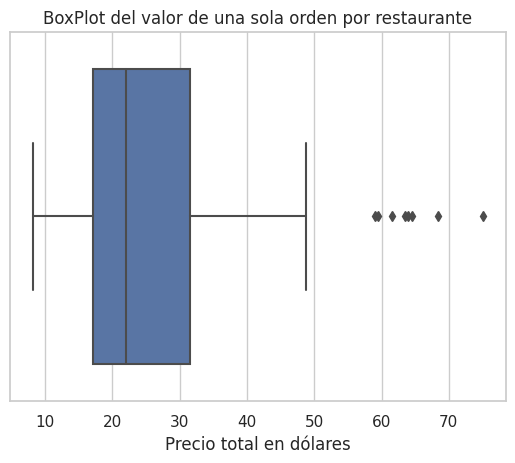

In [ ]:
#Boxplot for distribution of the single order restaurants
sns.boxplot(x = df_sorted3['TOTAL_PRICE'])
plt.title("Boxplot for distribution of the single order restaurants")
plt.xlabel("Total price in dollars")
plt.show()

In [ ]:
df_sorted3.describe().T

,count,mean,std,min,25%,50%,75%,max
TOTAL_PRICE,113.0,26.54177,13.932996,8.13,17.1,22.08,31.48,75.15
ORDERS,113.0,1.00000,0.000000,1.00,1.0,1.00,1.00,1.00


<div class="alert alert-block alert-warning" style="margin-top: 20px">

**Observation:** There are 113 restaurants with a single order. On average, an order generates $26.54; however, we will use the median value as a reference for decision-making when accepting orders from new restaurants due to the distribution of the data.

In [ ]:
#MEDIAN
df_sorted3['TOTAL_PRICE'].median()

22.08

<div class="alert alert-block alert-warning" style="margin-top: 20px">

We can have a good reference to take an order if it generates an ammount close to 22 dollars.

### Delivery time vs order price <a id="8"></a>

We will focus the analysis on the delivery time for each order generated by the restaurants in our top 15.

In [ ]:
lista = df_sorted['STORE_NAME'].head(16)

data_time = df[df['STORE_NAME'].isin(lista)].sort_values('STORE_NAME')
data_time = data_time[['STORE_NAME','SUBTOTAL_IN_DOLLARS','DELTA_TIME_MIN']]
data_time.head(20)

,STORE_NAME,SUBTOTAL_IN_DOLLARS,DELTA_TIME_MIN
318,BJs Restaurant & Brewhouse (Roseville - 436),30.90,39.508030
451,BJs Restaurant & Brewhouse (Roseville - 436),32.80,54.194846
634,BJs Restaurant & Brewhouse (Roseville - 436),30.55,41.286363
319,BJs Restaurant & Brewhouse (Roseville - 436),21.85,46.553067
311,BJs Restaurant & Brewhouse (Roseville - 436),38.45,51.566581
246,BJs Restaurant & Brewhouse (Roseville - 436),23.90,55.095712
442,BJs Restaurant & Brewhouse (Roseville - 436),22.90,0.324076
335,BJs Restaurant & Brewhouse (Roseville - 436),26.70,39.244163
583,BJs Restaurant & Brewhouse (Roseville - 436),62.00,2.272762
160,BJs Restaurant & Brewhouse (Roseville - 436),20.70,50.387070


We have obtained a dataset sorted by store, where each record includes the store's name, the order value, and the time taken to complete the order.

Our objective is to determine the delivery time for each order, enabling us to analyze the payment behaviors in relation to the time invested.

In [ ]:
data_time['SUBTOTAL_IN_DOLLARS']= data_time['SUBTOTAL_IN_DOLLARS'].astype(str)

data_time = data_time.sort_values('SUBTOTAL_IN_DOLLARS')

fig = px.line(data_time, x='SUBTOTAL_IN_DOLLARS', y='DELTA_TIME_MIN', color= 'STORE_NAME',
              labels = {'SUBTOTAL_IN_DOLLARS': 'Total Price in Dollars', 'DELTA_TIME_MIN': 'Time in minutes'},
              title='Time in minutes per order')
fig.show()

*Note:* You can click on the legends located on the right side of the graph to analyze the delivery time for each restaurant's orders.

<div class="alert alert-block alert-info" style="margin-top: 20px">

**You can view the graph at the following link:** [Time in minutes per order](https://rvdizeo.github.io/Door_Dash_App_Data_Analysis/Time_in_minutes_per_order.html)

#### Relationship between the average total generated by each store and the average time taken to deliver an order

In [ ]:
data_time[['SUBTOTAL_IN_DOLLARS']] = data_time[['SUBTOTAL_IN_DOLLARS']].astype("float")

df_price_prom = data_time.groupby(['STORE_NAME'])['SUBTOTAL_IN_DOLLARS'].agg(['median']).reset_index()

df_time_prom = data_time.groupby(['STORE_NAME'])['DELTA_TIME_MIN'].agg(['mean']).reset_index()
df_time_prom = df_time_prom.drop(['STORE_NAME'], axis=1)

df_prom = pd.concat([df_price_prom, df_time_prom], axis=1)
df_prom.columns = ['STORE_NAME', 'MEDIAN_PRICE', 'AVG_TIME']
df_prom.head(20)

,STORE_NAME,MEDIAN_PRICE,AVG_TIME
0,BJs Restaurant & Brewhouse (Roseville - 436),32.250,38.663947
1,Boudin SF (Roseville),26.600,32.491449
2,Burger Lounge (Roseville),31.890,33.212746
3,California Pizza Kitchen (293),35.150,36.179922
4,Chipotle (Creekside),34.950,37.809909
5,Crumbl Cookies (Roseville),17.100,29.653890
6,DashMart (SAC-2),21.760,25.987313
7,Jacks Urban Eats (Fountains),33.190,31.402588
8,"Lazy Dog Restaurant & Bar (Roseville, CA)",44.550,39.399310
9,McDonalds (13464-FOOTHILL & BASELINE),13.770,17.961120


In [ ]:
# Create Line plot
fig = px.line(df_prom, x=df_prom['STORE_NAME'], y=df_prom['MEDIAN_PRICE'],
              labels = {'STORE_NAME': 'Store Name', 'MEDIAN_PRICE': ' '},
              title='Median Price and Average Delivery Time of each Store')

# Add Scatter plot
fig.add_scatter(name="Average Time", x=df_prom['STORE_NAME'], y=df_prom['AVG_TIME'])

# Display the plot
fig.show()

<div class="alert alert-block alert-info" style="margin-top: 20px">

**You can view the graph at the following link:** [Median Price and Average Delivery Time of each Store](https://rvdizeo.github.io/Door_Dash_App_Data_Analysis/Median_Price_and_Average_Delivery_Time.html)

<div class="alert alert-block alert-warning" style="margin-top: 20px">

**Observation:**

**Orders to Avoid:**

* *McDonald's, Sonic Drive-In, and Taco Bell* should be avoided due to their low profitability, generating less than 20 dollars per order, which is inadequate given the time invested in delivery. Regarding Crumbl Cookies, while the average payment per order is 17 dollars, it's important to note that in certain instances, it can exceed 40 dollars. This should be considered when deciding whether to accept an order from this store.

**Consider Accepting Orders From:**

* Consider accepting orders from *BJs Restaurant & Brewhouse, Boudin SF, DashMart, Mendocino Farms, and Zocalo.* The order prices from these stores typically range from 22 to 30 dollars, with estimated delivery times of 25 to 37 minutes."

**Recommended Orders:**

* We should accept orders from Burger Lounge, California Pizza Kitchen, Chipotle, Jacks Urban Eats (Fountains), and The Cheesecake Factory, as they exhibit favorable indicators when considering new orders.

* Additionally, we should always accept orders from Lazy Dog Restaurant & Bar and Mezcalito Oaxacan Cuisine due to their excellent performance, averaging $37 to 44 dollars per order within 32 to 39 minutes.

##Restaurants map

We will download and read the location of the restaurants contained in another .CSV file

In [ ]:
#Importing locations dataset
locations='https://docs.google.com/spreadsheets/d/e/2PACX-1vRezNPvrK5sNBzIsDBs3M15QZ-k32g_hXMzRmVI3D8Dwyx_6EclyQDW3bd_hZXnkIspVDTEUISa00Y_/pub?gid=1188365268&single=true&output=csv'
df_locations = pd.read_csv(locations)
df_locations.head(16)

,STORE_NAME,LATITUDE,LONGITUDE
0,California Pizza Kitchen at Fountains at Rosev...,38.769207,-121.268583
1,Jack's Urban Eats,38.767538,-121.268141
2,Boudin SF,38.767612,-121.269850
3,BJ's Restaurant & Brewhouse,38.768004,-121.265189
4,The Cheesecake Factory,38.772870,-121.268480
5,Burger Lounge,38.767978,-121.268146
6,Zócalo Roseville,38.768150,-121.269777
7,Lazy Dog Restaurant & Bar,38.774738,-121.274126
8,DashMart by DoorDash,38.778120,-121.263218
9,Mendocino Farms,38.767787,-121.264707


We need to remove the apostrophes ('), which appear in the names of some stores, in order to plot them on the map.

In [ ]:
df_locations['STORE_NAME'] = df_locations['STORE_NAME'].str.replace("'",'')
df_locations.head()

,STORE_NAME,LATITUDE,LONGITUDE
0,California Pizza Kitchen at Fountains at Rosev...,38.769207,-121.268583
1,Jacks Urban Eats,38.767538,-121.268141
2,Boudin SF,38.767612,-121.269850
3,BJs Restaurant & Brewhouse,38.768004,-121.265189
4,The Cheesecake Factory,38.772870,-121.268480


We will map the restaurants by grouping them by location and adding markers to display their names.


<div class="alert alert-block alert-info" style="margin-top: 20px">

**You can view the map with the restaurant locations at the following link:** [Restaurants Location](https://rvdizeo.github.io/Door_Dash_App_Data_Analysis/map.html)

In [ ]:
from folium import plugins

# Roseville latitude and longitude values
latitude = 38.7525
longitude = -121.28944444444

# create map and display it
roseville_map = folium.Map(location=[latitude, longitude], zoom_start=12)


# instantiate a mark cluster object for the restaurants in the dataframe
restaurants = plugins.MarkerCluster().add_to(roseville_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df_locations.LATITUDE, df_locations.LONGITUDE, df_locations.STORE_NAME):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(restaurants)

    # show map
roseville_map

## Author

##### Ramiro Vasquez Di Zeo


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2023-08-02  | 1.0  | Di ZeoR  |  Moved NoteBook repo in GitHub |
|   |   |   |   |
|   |   |   |   |


## <h3 align="center"> All rights reserved. <h3/>
